# JSON Miniproject
****
+ Draw insights from a World Bank dataset from 
+ a school quality improvement project in Ethiopia   
****



## Imports for Python, Pandas

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np

## Problem 1
****
Find the 10 countries with most projects
****
We assume one line is one project since they have unique ID numbers, therefore there is no need to normalize the JSON file.

In [2]:
# Load file as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')
df.head()


,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [3]:
# Group by country, count projects, and return a series sorted by values
df_grouped = df.groupby('countryname')['_id'].count()
problem1 = df_grouped.sort_values(ascending=False).head(10)
print(problem1)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: _id, dtype: int64


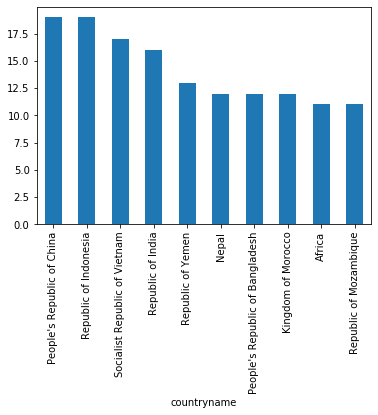

In [14]:
# Plot the results
problem1.plot(x = 'countryname', kind='bar')

## Problem 2
****
Find the top 10 major project themes (using column 'mjtheme_namecode')
****

In [5]:
# load json as string
file = 'data/world_bank_projects.json'
json_format = json.load((open(file)))

In [6]:
# Normalize columns of interest and populate the table created from nested elements
df_norm = json_normalize(json_format, 'mjtheme_namecode', ['countryname', ['_id', '$oid']])
df_norm.head(20)

,code,name,countryname,_id.$oid
0,8,Human development,Federal Democratic Republic of Ethiopia,52b213b38594d8a2be17c780
1,11,,Federal Democratic Republic of Ethiopia,52b213b38594d8a2be17c780
2,1,Economic management,Republic of Tunisia,52b213b38594d8a2be17c781
3,6,Social protection and risk management,Republic of Tunisia,52b213b38594d8a2be17c781
4,5,Trade and integration,Tuvalu,52b213b38594d8a2be17c782
5,2,Public sector governance,Tuvalu,52b213b38594d8a2be17c782
6,11,Environment and natural resources management,Tuvalu,52b213b38594d8a2be17c782
7,6,Social protection and risk management,Tuvalu,52b213b38594d8a2be17c782
8,7,Social dev/gender/inclusion,Republic of Yemen,52b213b38594d8a2be17c783
9,7,Social dev/gender/inclusion,Republic of Yemen,52b213b38594d8a2be17c783


In [7]:
# Get theme names from codes
theme_names = json_normalize(json_format, 'mjtheme_namecode').sort_values('code').replace(r'^\s*$', np.nan, regex=True)
theme_names = theme_names.dropna().drop_duplicates()
dict_names = dict(zip(list(theme_names.code), list(theme_names.name)))
print(dict_names)

{'1': 'Economic management', '10': 'Rural development', '11': 'Environment and natural resources management', '2': 'Public sector governance', '3': 'Rule of law', '4': 'Financial and private sector development', '5': 'Trade and integration', '6': 'Social protection and risk management', '7': 'Social dev/gender/inclusion', '8': 'Human development', '9': 'Urban development'}


In [8]:
# Group by code, aggregate, sort and print the ten major themes
df_grouped2 = df_norm.groupby('code')['_id.$oid'].count()
top_codes = df_grouped2.sort_values(ascending=False).head(10)
print(top_codes)

code
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: _id.$oid, dtype: int64


In [9]:
# Add the names of the themes
top_codes = top_codes.reset_index()
top_codes['theme name'] = top_codes['code'].map(dict_names)
top_codes = top_codes.rename(columns={'_id.$oid': 'number of projects', 'code': 'theme code'})
print(top_codes)

  theme code  number of projects                                    theme name
0         11                 250  Environment and natural resources management
1         10                 216                             Rural development
2          8                 210                             Human development
3          2                 199                      Public sector governance
4          6                 168         Social protection and risk management
5          4                 146      Financial and private sector development
6          7                 130                   Social dev/gender/inclusion
7          5                  77                         Trade and integration
8          9                  50                             Urban development
9          1                  38                           Economic management


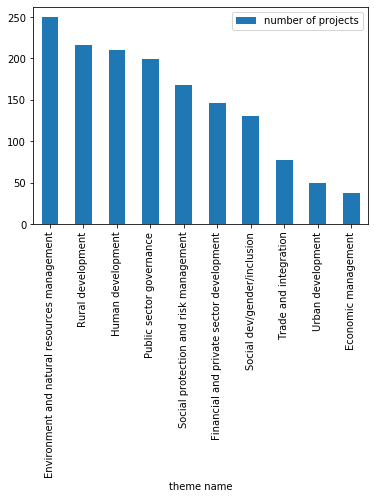

In [10]:
# Plot the results
top_codes.plot(x= 'theme name', kind='bar')

## Problem 3
****
In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in
****
Note: This has been done for the top ten table above, but I will fill the missing names for the entire dataframe df_norm with a different method for the sake of the exercise

In [11]:
# Sort by theme code and rename project ID column
df_norm_full = df_norm.sort_values(by = 'code').rename(columns={'_id.$oid': 'project ID', 'code': 'theme code', 'name': 'theme name'}).set_index('project ID')
df_norm_full = df_norm_full.replace(r'^\s*$', np.nan, regex=True).fillna(method = 'ffill')
df_norm_full.head()

,theme code,theme name,countryname
project ID,,,
52b213b38594d8a2be17c81f,1,Economic management,Democratic Republic of Sao Tome and Prin
52b213b38594d8a2be17c91a,1,Economic management,Oriental Republic of Uruguay
52b213b38594d8a2be17c919,1,Economic management,Republic of Colombia
52b213b38594d8a2be17c919,1,Economic management,Republic of Colombia
52b213b38594d8a2be17c915,1,Economic management,Kingdom of Tonga


In [12]:
#To verify the fill is correct, compile the count of 'theme code' and 'theme name'
df_grouped3 = df_norm_full.groupby('theme code')['countryname'].count()
df_grouped4 = df_norm_full.groupby('theme name')['countryname'].count()

df_grouped3 = df_grouped3.reset_index()
df_grouped4 = df_grouped4.reset_index()

df_grouped3['theme name'] = df_grouped3['theme code'].map(dict_names)
df_grouped3 = df_grouped3.sort_values('theme name')


In [13]:
# Compare the count from 'theme code' and 'theme name'
count_code = list(df_grouped3['countryname'])
count_name = list(df_grouped4['countryname'])

print(count_code == count_name)

True
